# Digit Image Classification

## Introduction
In the following project, we are going to classify the given digit images into ten possible classes. Each image is a matrix of 256\*256 pixels, in which every pixel is a number in range of [0, 255]. We use the [_MNIST_](http://yann.lecun.com/exdb/mnist/) dataset, which contains 60000 images for train set and 10000 images for test set.

The main idea of the following solution has been inspired by the [_Neural Network_ playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) of 3Blue1Brown's youtube channel.  
Also, the formulas came from [this](http://neuralnetworksanddeeplearning.com/chap2.html) article by [_Michael Nielsen_](http://michaelnielsen.org/).

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

## Reading Datasets

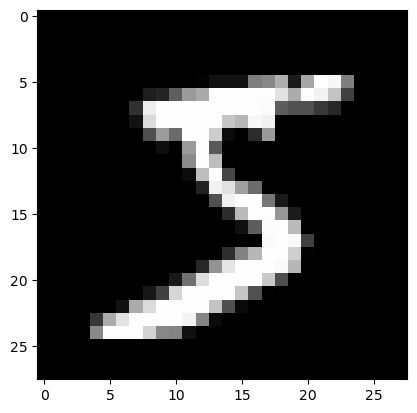

5


In [78]:
# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

def get_maximux_label(labels_activation):
    maximum_label = 0
    for i in range(10):
        if labels_activation[i] > labels_activation[maximum_label]:
            maximum_label = i
    return maximum_label


# Reading The Train Set
train_images_file = open('./Datasets/train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('./Datasets/train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('./Datasets/t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('./Datasets/t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()
print(get_maximux_label(train_set[0][1]))

## Generate Layers with Random Weights
In our solution, we assume that there are two hidden layers with 16 neurons. We initialize weights with random values, then try to train our model.

In [79]:
def get_random_weight(shape):
    res = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            res[i][j] = np.random.random_sample() * 2 - 1 # random numbers in range [-1, 1]
    return res

class Layer():
    def __init__(self, W):
        self.W = W
        self.b = np.zeros((W.shape[0], 1))


layers = [
    Layer(get_random_weight((16, 784))), # first perceptron 784*16
    Layer(get_random_weight((16, 16))), # second perceptron 16*16
    Layer(get_random_weight((10, 16))), # last layer
]

## Apply Feed Forward
The following code will apply feed forward algorithm. Here are some descriptions for used variables:

**_W\[l\]\[i\]\[j\]_**: weight of the j-th neuron in _l - 1_-th layer to i-th neuron in _l_-th layer.  
**_b\[l\]\[i\]_**: bias value for i-th neuron in l-th layer.  
**_Z\[l\]\[i\]_**: sum of all _W\[l\]\[i\]\[j\]_ multiplied by _A\[l-1\]\[j\]_ for all _j_ neurons in _l-1_-th layer, plus _b\[l\]\[i\]_ .  
**_A\[l\]\[i\]_**: sigmoid(_Z\[l\]\[i\]_).

In [80]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def vector_sigmoid(A):
    for i in range(A.shape[0]):
        A[i] = sigmoid(A[i])
    return A

def sigmoid_der(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

def vector_sigmoid_der(A):
    for i in range(A.shape[0]):
        A[i] = sigmoid_der(A[i])
    return A
    
    
def compute_result_for_an_image(img):
    A = [
        np.array(img).reshape(784, 1),
        np.zeros((16, 1)),
        np.zeros((16, 1)),
        np.zeros((10, 1))
    ]
    
    Z = [0 for x in range(3)]
    
    for i in range(3):
        A[i + 1] = np.matmul(layers[i].W, A[i])
        A[i + 1] += layers[i].b
        Z[i] = copy.deepcopy(A[i + 1])
        A[i + 1] = vector_sigmoid(A[i + 1])
    
    return A, Z

def report_success_rate_for_test_images():
    correct_answer = 0
    for i in range(len(test_set)):
        computed_answer = get_maximux_label(compute_result_for_an_image(test_set[i][0])[0][-1])
        if computed_answer == get_maximux_label(test_set[i][1]):
            correct_answer += 1
    return correct_answer / len(test_set)

print("Success rate for the first iteration: " + str(report_success_rate_for_test_images() * 100) + "%")

Success rate for the first iteration: 10.08%


## Apply Backpropagation (inefficient calculation)


Epoch 1 err: [0.90326875]
Epoch 2 err: [0.88350957]
Epoch 3 err: [0.87325262]
Epoch 4 err: [0.86426257]
Epoch 5 err: [0.85528674]
Epoch 6 err: [0.84578695]
Epoch 7 err: [0.83553096]
Epoch 8 err: [0.82445435]
Epoch 9 err: [0.81257479]
Epoch 10 err: [0.79993258]
Epoch 11 err: [0.78655866]
Epoch 12 err: [0.77248181]
Epoch 13 err: [0.75775856]
Epoch 14 err: [0.74249289]
Epoch 15 err: [0.72681689]
Epoch 16 err: [0.71085356]
Epoch 17 err: [0.6947086]
Epoch 18 err: [0.67848041]
Epoch 19 err: [0.66226086]
Epoch 20 err: [0.64612785]
Epoch 21 err: [0.63013987]
Epoch 22 err: [0.61433771]
Epoch 23 err: [0.59875294]
Epoch 24 err: [0.58341806]
Epoch 25 err: [0.56836722]
Epoch 26 err: [0.55362494]
Epoch 27 err: [0.5391982]
Epoch 28 err: [0.52507788]
Epoch 29 err: [0.51124363]
Epoch 30 err: [0.4976715]
Epoch 31 err: [0.4843463]
Epoch 32 err: [0.47127359]
Epoch 33 err: [0.45847647]
Epoch 34 err: [0.44597499]
Epoch 35 err: [0.43377226]
Epoch 36 err: [0.42185628]
Epoch 37 err: [0.41020682]
Epoch 38 err: 

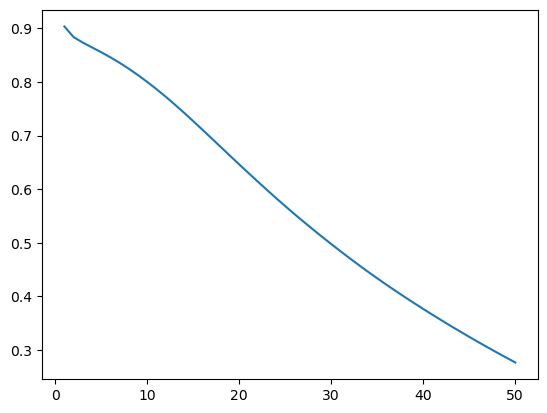

In [81]:
%%time

def calculate_error_for_train_set(count):
    res = 0
    for i in range(count):
        img = train_set[i]
        A, Z = compute_result_for_an_image(img[0])
        for i in range(10):
            res += (A[-1][i] - img[1][i]) ** 2
    return res / count

learning_rate = 1
epoch_count = 50
batch_size = 10
epoch_errors = []

for epoch in range(epoch_count):
    print("Epoch", epoch + 1, flush=True, end=' ')
    np.random.shuffle(train_set[:100])
    for batch_start in range(0, 100, batch_size):
        grad_W = [
            np.zeros((16, 784)),
            np.zeros((16, 16)),
            np.zeros((10, 16)),
        ]
        
        grad_b = [
            np.zeros((16, 1)),
            np.zeros((16, 1)),
            np.zeros((10, 1)),
        ]
        
        for img_index in range(batch_start, batch_start + batch_size):
            if img_index >= len(train_set):
                break
        
            layer_err = [
                np.zeros((16, 1)),
                np.zeros((16, 1)),
                np.zeros((10, 1)),
            ]
        
            # output of the network for the given image
            A, Z = compute_result_for_an_image(train_set[img_index][0])
            for neuron_index in range(layer_err[-1].shape[0]):
                layer_err[-1][neuron_index] = (A[-1][neuron_index] - train_set[img_index][1][neuron_index]) * sigmoid_der(Z[-1][neuron_index])
            
            for layer_index in range(1, -1, -1):
                layer_err[layer_index] = np.matmul(np.transpose(layers[layer_index + 1].W), layer_err[layer_index + 1])
                sig_der = vector_sigmoid_der(Z[layer_index])
                for layer_err_index in range(layer_err[layer_index].shape[0]):
                    layer_err[layer_index][layer_err_index] *= sig_der[layer_err_index]
            
            for i in range(3):
                grad_b[i] += layer_err[i]
            
            for l in range(3):
                for j in range(grad_W[l].shape[0]):
                    for i in range(grad_W[l].shape[1]):
                        grad_W[l][j][i] += A[l][i] * layer_err[l][j]
        
        for l in range(3):
            for j in range(layers[l].W.shape[0]):
                for i in range(layers[l].W.shape[1]):
                    layers[l].W[j][i] -= learning_rate * grad_W[l][j][i] / batch_size
            
            for j in range(layers[l].b.shape[0]):
                layers[l].b[j] -= learning_rate * grad_b[l][j] / batch_size
    epoch_errors.append(calculate_error_for_train_set(100))
    print("err:", epoch_errors[-1])

    
plt.plot(range(1, epoch_count + 1), epoch_errors)        

In [82]:
print("Success rate for the test set: " + str(report_success_rate_for_test_images() * 100) + "%")

Success rate for the test set: 52.470000000000006%


## Apply Backpropagation (using vectorization)

Epoch 1 err: [0.26791209]
Epoch 11 err: [0.1902634]
Epoch 21 err: [0.13448496]
Epoch 31 err: [0.09809227]
Epoch 41 err: [0.07546866]
Epoch 51 err: [0.06051504]
Epoch 61 err: [0.05025043]
Epoch 71 err: [0.04298192]
Epoch 81 err: [0.03768992]
Epoch 91 err: [0.03370546]
Epoch 101 err: [0.03061966]
Epoch 111 err: [0.02817545]
Epoch 121 err: [0.02620305]
Epoch 131 err: [0.02458594]
Epoch 141 err: [0.02324001]
Epoch 151 err: [0.02210375]
Epoch 161 err: [0.02113233]
Epoch 171 err: [0.02029275]
Epoch 181 err: [0.01956035]
Epoch 191 err: [0.0189163]
CPU times: user 14.1 s, sys: 60 ms, total: 14.1 s
Wall time: 14.1 s


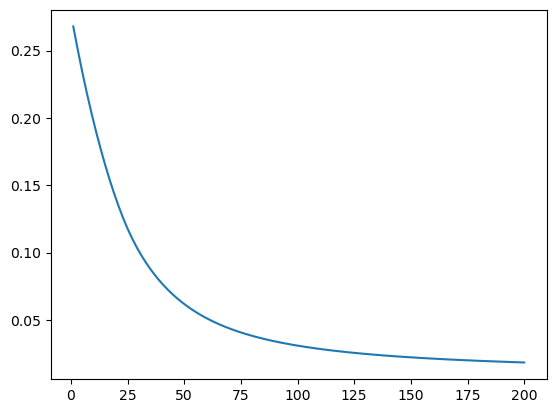

In [83]:
%%time

epoch_count = 200
batch_size = 10
epoch_errors = []

grad_W = [
    np.zeros((16, 784)),
    np.zeros((16, 16)),
    np.zeros((10, 16)),
]

grad_b = [
    np.zeros((16, 1)),
    np.zeros((16, 1)),
    np.zeros((10, 1)),
]

layer_err = [
    np.zeros((16, 1)),
    np.zeros((16, 1)),
    np.zeros((10, 1)),
]

for epoch in range(epoch_count):
    if epoch % 10 == 0:
        print("Epoch", epoch + 1, flush=True, end=' ')
    np.random.shuffle(train_set[:100])
    
    for batch_start in range(0, 100, batch_size):
        for i in range(3):
            grad_W[i] *= 0
            grad_b[i] *= 0
            layer_err[i] *= 0
        
        for img_index in range(batch_start, batch_start + batch_size):
            if img_index >= len(train_set):
                break
            
            # output of the network for the given image
            A, Z = compute_result_for_an_image(train_set[img_index][0])
            layer_err[-1] = (A[-1] - train_set[img_index][1]) * vector_sigmoid_der(Z[-1])
            
            for layer_index in range(1, -1, -1):
                layer_err[layer_index] = np.matmul(np.transpose(layers[layer_index + 1].W), layer_err[layer_index + 1])
                layer_err[layer_index] *= vector_sigmoid_der(Z[layer_index])
            
            for i in range(3):
                grad_b[i] += layer_err[i]
            
            for l in range(3):
                grad_W[l] += np.matmul(layer_err[l], np.transpose(A[l]))
        
        for l in range(3):
            layers[l].W -= learning_rate * grad_W[l] / min(batch_size, len(train_set) - batch_start + batch_size)
            layers[l].b -= learning_rate * grad_b[l] / min(batch_size, len(train_set) - batch_start + batch_size)
    epoch_errors.append(calculate_error_for_train_set(100))
    if epoch % 10 == 0:
        print("err:", epoch_errors[-1])

    
plt.plot(range(1, epoch_count + 1), epoch_errors)     

In [84]:
print("Success rate for the test set: " + str(report_success_rate_for_test_images() * 100) + "%")

Success rate for the test set: 58.620000000000005%


## Using Model for the whole test set

Epoch 1 err: [0.24321179]
Epoch 2 err: [0.19054555]
Epoch 3 err: [0.16479397]
Epoch 4 err: [0.15005597]
Epoch 5 err: [0.13985379]
CPU times: user 4min 39s, sys: 144 ms, total: 4min 39s
Wall time: 4min 40s


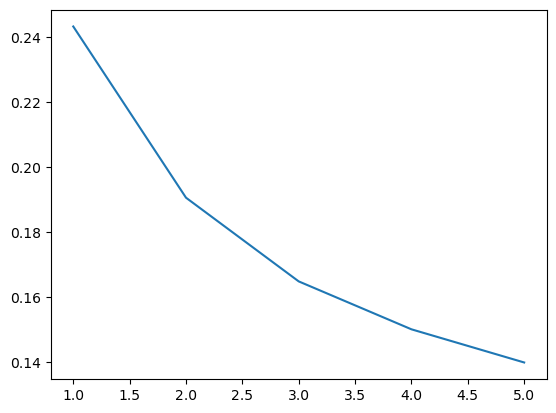

In [85]:
%%time

epoch_count = 5
batch_size = 50
epoch_errors = []

grad_W = [
    np.zeros((16, 784)),
    np.zeros((16, 16)),
    np.zeros((10, 16)),
]

grad_b = [
    np.zeros((16, 1)),
    np.zeros((16, 1)),
    np.zeros((10, 1)),
]

layer_err = [
    np.zeros((16, 1)),
    np.zeros((16, 1)),
    np.zeros((10, 1)),
]

for epoch in range(epoch_count):
    print("Epoch", epoch + 1, flush=True, end=' ')
    np.random.shuffle(train_set)
    
    for batch_start in range(0, len(train_set), batch_size):
        for i in range(3):
            grad_W[i] *= 0
            grad_b[i] *= 0
            layer_err[i] *= 0
        
        for img_index in range(batch_start, batch_start + batch_size):
            if img_index >= len(train_set):
                break
            
            # output of the network for the given image
            A, Z = compute_result_for_an_image(train_set[img_index][0])
            layer_err[-1] = (A[-1] - train_set[img_index][1]) * vector_sigmoid_der(Z[-1])
            
            for layer_index in range(1, -1, -1):
                layer_err[layer_index] = np.matmul(np.transpose(layers[layer_index + 1].W), layer_err[layer_index + 1])
                layer_err[layer_index] *= vector_sigmoid_der(Z[layer_index])
            
            for i in range(3):
                grad_b[i] += layer_err[i]
            
            for l in range(3):
                grad_W[l] += np.matmul(layer_err[l], np.transpose(A[l]))
        
        for l in range(3):
            layers[l].W -= learning_rate * grad_W[l] / min(batch_size, len(train_set) - batch_start + batch_size)
            layers[l].b -= learning_rate * grad_b[l] / min(batch_size, len(train_set) - batch_start + batch_size)
    epoch_errors.append(calculate_error_for_train_set(len(train_set)))
    print("err:", epoch_errors[-1])

    
plt.plot(range(1, epoch_count + 1), epoch_errors)     

In [87]:
def report_success_rate_for_train_images():
    correct_answer = 0
    for i in range(len(train_set)):
        computed_answer = get_maximux_label(compute_result_for_an_image(train_set[i][0])[0][-1])
        if computed_answer == get_maximux_label(train_set[i][1]):
            correct_answer += 1
    return correct_answer / len(train_set)

print("Success rate for the train set: " + str(report_success_rate_for_train_images() * 100) + "%")
print("Success rate for the test set: " + str(report_success_rate_for_test_images() * 100) + "%")

Success rate for the train set: 91.25999999999999%
Success rate for the test set: 90.86999999999999%
